In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [39]:
df = pd.read_csv('data/data.csv')
millenial_df = df[(df['year'] >= 2010) & (df['year'] <= 2021)].sort_values(by='danceability')
dance_asc = millenial_df[(millenial_df['danceability'] >= .7) & (df['danceability'] < 1)]
dance_asc

/home/atlas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
17972,0.036900,"['Jeremih', '50 Cent']",0.700,228453,0.598,0,0x3TibRgnSqzkcwrqBd4iX,0.000000,2,0.1110,-7.783,1,Down On Me,70,2010-01-01,0.1140,160.041,0.5940,2010
18504,0.219000,"['Big Sean', 'Lil Wayne', 'Jhené Aiko']",0.700,235187,0.554,1,6bxUnsSGZCmoHHU5auwtps,0.000001,1,0.4190,-5.909,1,Beware,71,2013-01-01,0.1870,97.127,0.0633,2013
172032,0.001960,['L.B.G.'],0.700,194240,0.913,0,44W8eiQmIsUencJYnQAZvb,0.000041,5,0.0667,-5.120,0,Good As My Love - Single Edit,0,2013-03-22,0.0501,129.972,0.8730,2013
17811,0.055100,['Noisecontrollers'],0.700,368000,0.917,0,4qjUVWM2BgIIpVtoF9uhp5,0.024800,5,0.1180,-5.678,0,CTRL.ALT.DELETE (In Qontrol Anthem 2009),19,2020-02-03,0.0986,150.011,0.3860,2020
92704,0.010500,"['SMO', 'Alexander King']",0.700,214467,0.647,0,4fkUsaC0dJfHp5N1kIrZlr,0.000000,2,0.2510,-6.497,1,Workin' (feat. Alexander King),57,2014-06-03,0.0483,86.013,0.2420,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37455,0.002970,['Tone-Loc'],0.985,249464,0.914,0,2ui62KKhQgwsUF8afLpyXZ,0.000188,0,0.0408,-7.788,1,Funky Cold Medina - Re-Recorded,7,2010-12-21,0.1520,117.003,0.8050,2010
171536,0.022500,"['Dan McKie', 'Zigmund Slezak']",0.985,420000,0.725,0,0SjbmPZN8qUax64tIGod3G,0.307000,0,0.0687,-3.680,1,Dddance - Zigmund Slezak Remix,0,2013-01-07,0.2300,128.016,0.5910,2013
92739,0.124000,['Nilla Pizzi'],0.985,211620,0.522,0,2ppnJ8Wz2US6hbHGX61zy4,0.902000,8,0.1320,-10.259,1,O mama mama - Remix 2014,0,2014-11-27,0.2860,125.006,0.6910,2014
141441,0.145000,"['Pitbull', 'Trina', 'Young Bo']",0.986,229669,0.597,1,1MgM0WDaoQ2A3bnIQTR6ty,0.000002,8,0.1970,-6.809,1,Go Girl,52,2012-05-08,0.3080,115.004,0.7610,2012


In [41]:
big_dance = dance_asc[dance_asc['danceability'] >= .85]
big_dance

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
173749,0.117000,['Drake'],0.850,157605,0.473,1,41a7dZcq30Ss5kPMayWRV0,0.010300,10,0.1080,-5.747,0,That’s How You Feel,64,2018-06-29,0.2090,85.454,0.380,2018
158297,0.313000,['Nicki Minaj'],0.850,279867,0.787,1,6Poyf51k7W3NKnsGwAI90B,0.000000,8,0.1940,-4.134,0,Barbie Dreams,65,2018-08-10,0.3380,87.983,0.700,2018
38528,0.119000,"['Gucci Mane', 'Drake']",0.850,190312,0.405,1,5tFep7dXGd7vEJ668wTPux,0.000118,7,0.0707,-7.509,0,Both (feat. Drake),68,2016-12-16,0.2250,139.976,0.344,2016
142539,0.013900,"['Bad Bunny', 'Diplo', 'Nitti Gritti']",0.850,170509,0.500,1,5jGUJXnELDaDTgiRjD9lsg,0.000384,8,0.0947,-6.708,1,200 Mph,69,2018-12-23,0.0665,160.020,0.816,2018
125866,0.003730,['Nathan Palm'],0.850,344867,0.589,0,3RhheLTvNo5fHW6WjH1UeF,0.727000,0,0.0537,-8.548,1,Yearning - Original Mix,0,2016-12-30,0.1160,119.987,0.541,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37455,0.002970,['Tone-Loc'],0.985,249464,0.914,0,2ui62KKhQgwsUF8afLpyXZ,0.000188,0,0.0408,-7.788,1,Funky Cold Medina - Re-Recorded,7,2010-12-21,0.1520,117.003,0.805,2010
171536,0.022500,"['Dan McKie', 'Zigmund Slezak']",0.985,420000,0.725,0,0SjbmPZN8qUax64tIGod3G,0.307000,0,0.0687,-3.680,1,Dddance - Zigmund Slezak Remix,0,2013-01-07,0.2300,128.016,0.591,2013
92739,0.124000,['Nilla Pizzi'],0.985,211620,0.522,0,2ppnJ8Wz2US6hbHGX61zy4,0.902000,8,0.1320,-10.259,1,O mama mama - Remix 2014,0,2014-11-27,0.2860,125.006,0.691,2014
141441,0.145000,"['Pitbull', 'Trina', 'Young Bo']",0.986,229669,0.597,1,1MgM0WDaoQ2A3bnIQTR6ty,0.000002,8,0.1970,-6.809,1,Go Girl,52,2012-05-08,0.3080,115.004,0.761,2012


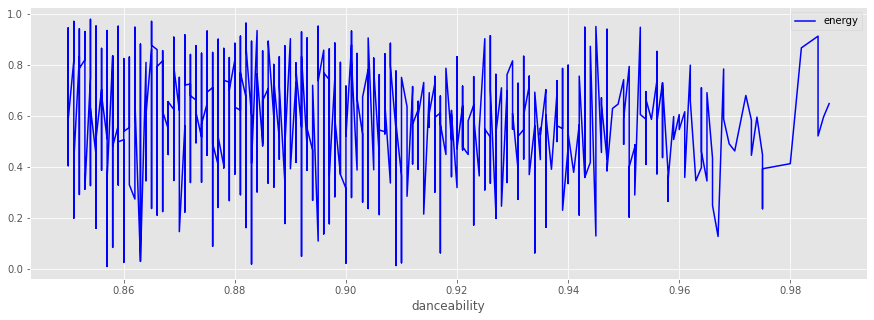

In [46]:
big_dance.plot(kind='line',x='danceability',y='energy',color='blue',figsize=(15,5))
plt.show()